<a href="https://colab.research.google.com/github/sai-bharghav/Deep-Learning/blob/main/PyTorch_Computer_Vision_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a convulutional neural networks?

A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data. It contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what color each pixel should be.

## 0. Computer vision libraries in PyTorch

* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for computer vision
* `torchvision.datasets` - get datasets adn data loading fucntions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for our own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader`- Creates a Python Iterable over a dataset

In [1]:
# Import modules
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a dataset

The dataset which we will be using is FashionMNIST from torchvision.dataset which consists of grayscale images of clothes (shirt, pant, shoes etc)

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', # Where to download the data to
    train = True, # Do we want the training dataset or if it is False we would get Testing dataset
    download=True, # Do we want to download it
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root='data',
    train = False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26421880/26421880 [00:00<00:00, 129770634.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 97707089.63it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 61385943.67it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7912157.20it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data)

(60000, 10000)

We have 60000 train samples and 10000 test samples

In [4]:
# See the first training example
img,label = train_data[0]
img,label,img.shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

The shape of the image is `[1,28,28]` which is in the order of color channels, Height and width. `color channels = 1, Height = 28, width = 28`


if color channels is 1 then the image is in grayscale and 3 represents the image is in a color format

Since we have 60000 samples of train data and 10000 samples of test data, what classes each image represent to and how many classes do we have?

We can make use of `.classes` attribute to get this information


In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

If we want the class names with the index we can use the attribute `class_to_idx` to get this information

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Sweet !!! We have 10 different classes and it is a **multiclass classification problem**

In [7]:
# get it together
print(f'Image shape : {img.shape} -> [color channel, height, width]')
print(f'Image label : {class_names[label]}')

Image shape : torch.Size([1, 28, 28]) -> [color channel, height, width]
Image label : Ankle boot


## 1.2 Visualize the data

Since we are using PyTorch we follow the shape NCHW where color channels is the first but if we are using other machine learning models they might follow NHWC where color channels is the last

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

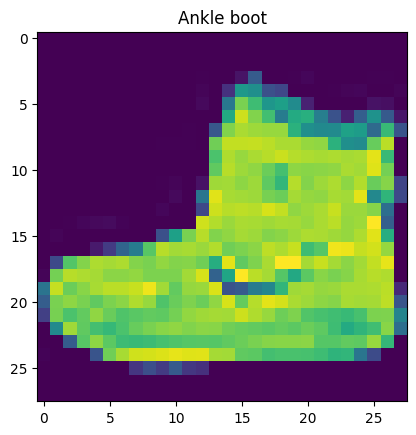

In [8]:
image, label = train_data[0]
print(f'Image shape : {image.shape}')
plt.imshow(image.squeeze())
plt.title(class_names[label])

If we run the line `plt.imshow(image)` without any `squeeze()` the python will throw an error saying that there is a shape mismatch.

Since we are delaing with a grayscale image and matplotlib doesn't expect any color channel data or if there is a color channel data, it expects to be at the last, not at the first

The shape is `[1,28,28]` which will throw an error but when the shape is `[28,28,1]` or `[28,28]`(for grayscale no need to have color channel) matplotlib doesn't thrown any error

(-0.5, 27.5, 27.5, -0.5)

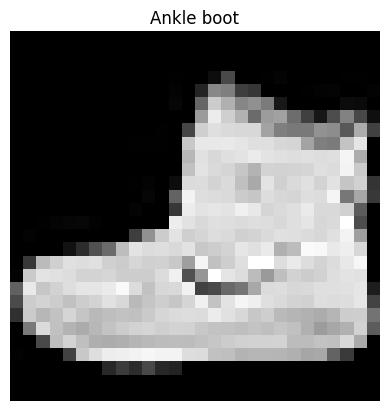

In [9]:
# Let us see the exact image of a grayscale we are dealing with
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

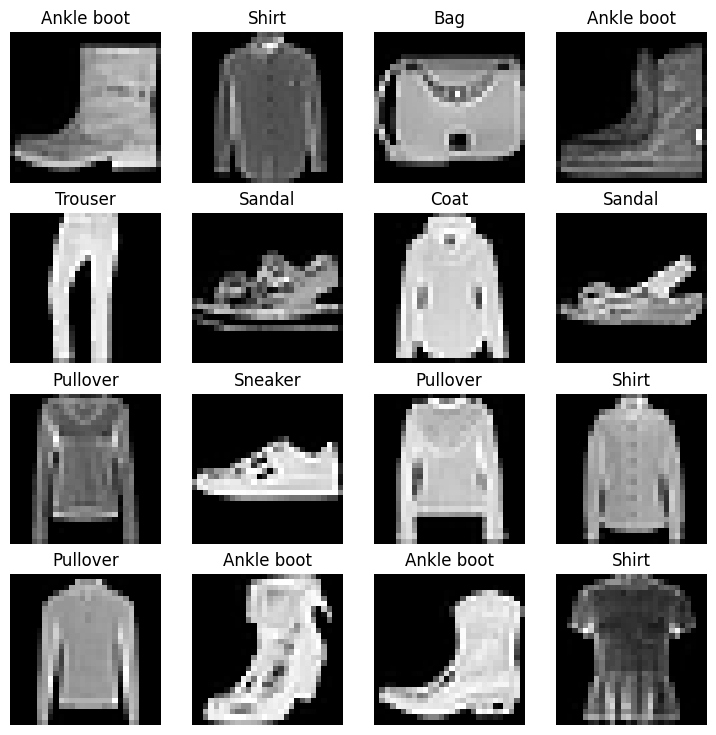

In [10]:
# Let us view a few more images from the dataset
# Let us keep the seed
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

Hmmm, this dataset doesn't look too aesthetic.

But the principles I am  going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could we write a program to classify each one of them?

We probably could.

Do you think these items of clother (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader


Right now, our data is in the form of PyTorch Datasets.

DataLaoder turns our dataset into a Python Iterable

More specifically, we want to turn our data into **batches** or **mini batches**

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.


What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Let's create `DataLoader`'s for our training and test sets.

In [11]:
from torch.utils.data import DataLoader


# Setup the batch size hyperparamter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False) # Keep the order of the test data


# Check it out
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a3360609060>,
 <torch.utils.data.dataloader.DataLoader at 0x7a336060ad40>)

We have got the instances of the dataloader

In [12]:
# Let's check out what we created
print(f'DataLoaders {train_dataloader,test_dataloader}')
print(f'Length of the train dataloader : {len(train_dataloader)} Batches of {BATCH_SIZE}')
print(f'Length of the test dataloader :{len(test_dataloader)} Batches of {BATCH_SIZE}')

DataLoaders (<torch.utils.data.dataloader.DataLoader object at 0x7a3360609060>, <torch.utils.data.dataloader.DataLoader object at 0x7a336060ad40>)
Length of the train dataloader : 1875 Batches of 32
Length of the test dataloader :313 Batches of 32


In [13]:
# Check out what is inside the training dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 8, label shape torch.Size([])


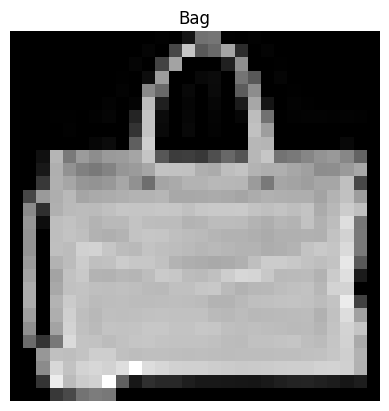

In [14]:
# How would we visualize
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size : {img.shape}')
print(f'Label : {label}, label shape {label.shape}')


## 3. Model0: Build a baseline model


When starting to build a series of amchine learning modelling experiments, it's best practics to start with a baseline model

A baseline model is a simple model you will try an improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [15]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]


# Let's flatten the sample
output = flatten_model(x) # Perform forward pass
print(f'Shape before flattening : {x.shape}')
print(f'SHape after flattening: {output.shape}')

Shape before flattening : torch.Size([1, 28, 28])
SHape after flattening: torch.Size([1, 784])


We have gone from `[1,28,28]` [color_channel,height, weight] to `[1,784]`[ color_channel,height*width]

The `nn.Flatten` is responsible for for converting the shape of the data. Why do we do this?

We want our data to convert our height and width channel to a single long feature

So let us continue to build our first model with `nn.Flatten()`

In [16]:
from torch import nn
class FashionMNISTMOdelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

We have to specify some of the parameters while instanciating the model

`input_shape=784`: This is how many features we have got using in the model , in our case, it is one for every pixel in the target image. (28*28=784)

`hidden_units = 10`:number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.

`output_shape=len(class_names)` : since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

In [17]:
torch.manual_seed(42)

# Setup the model with instances
model_0=FashionMNISTMOdelV0(
    input_shape=784,# this is 28*28
    hidden_units=10,
    output_shape=len(class_names) # One for every class
).to('cpu')

model_0

FashionMNISTMOdelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

Let us use our `helper_functions.py`

* Loss Function - Since we're working with mutli-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent'


* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [19]:
# Import the accuracy function
from helper_functions import accuracy_fn

# Setup loss and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr=0.1
)

### 3.2 Creating a function to time our experiments


Machinelearning is very experimental

Two fo the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

We will try to run the model on both CPU and GPU and compre the time taken by the model to learn and predict

We will use `default_timer()` function  from `timeit` module python




In [20]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time onn {device}: {total_time :.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data


Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our `DataLoaders`, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and` y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.


1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through test batches, perform testing steps, calculate the test loss *per epoch*
4. Print out what's happening
5. Time it all (for fun)

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we will keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n......')
  ### Training
  train_loss=0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calcualte the loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss+=loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    # Print out what's happening
    if batch % 400==0:
      print(f' Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  ### TESTING
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2.Calculate the loss
      test_loss+= loss_fn(test_pred,y_test)

      #3. Calcualte the accuracy
      test_acc +=accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss/=len(test_dataloader)

    # Calcualte the test accuracy per batch
    test_acc/= len(test_dataloader)

  # Print out what is happening
  print(f'\n Train loss:{train_loss :.4f} | Test loss : {test_loss :.4f} | Test accuracy :{test_acc:.4f}')

# Calcualte the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
......
 Looked at 0/60000 samples
 Looked at 12800/60000 samples
 Looked at 25600/60000 samples
 Looked at 38400/60000 samples
 Looked at 51200/60000 samples

 Train loss:0.5904 | Test loss : 0.5095 | Test accuracy :82.0387
Epoch : 1
......
 Looked at 0/60000 samples
 Looked at 12800/60000 samples
 Looked at 25600/60000 samples
 Looked at 38400/60000 samples
 Looked at 51200/60000 samples

 Train loss:0.4763 | Test loss : 0.4799 | Test accuracy :83.1969
Epoch : 2
......
 Looked at 0/60000 samples
 Looked at 12800/60000 samples
 Looked at 25600/60000 samples
 Looked at 38400/60000 samples
 Looked at 51200/60000 samples

 Train loss:0.4550 | Test loss : 0.4766 | Test accuracy :83.4265
Train time onn cpu: 49.978 seconds


## 4. Make predictions and get Model 0 Resukts

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [22]:
torch.manual_seed(42)
def eval_model( model : torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true = y,
                       y_pred = y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/ per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc":acc}

# Calcualte model 0 results on test dataset
model_0_results = eval_model(model= model_0,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

**Note**: Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some device-agnostic code for our models and data to run on GPU if it's available.

In [23]:
# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Building a better model with non-linearity

We learned about the non-linearity in our second notebook




In [24]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features = output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)


In [25]:
# Createa an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units=10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

### 6.1 Setup loss, optimizer and evaluation metrics


In [26]:
from helper_functions import accuracy_fn

# Set up the loss function
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),# Tries to update our model parameters to reduce our loss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature `(X)` and target `(y)` tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.


Let's create a function for:
* training loop = `train_step()`
* testing loop = `test_step()`

In [27]:
from tqdm.auto import tqdm
def train_step(model:nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device : torch.device=device,
               accuracy_fn=accuracy_fn):
  """Performas a traiing with model trying to learn on data_loader."""
  train_loss, train_acc=0,0
  model.to(device)

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(dataloader):
    # Put data on target device
    X,y= X.to(device),y.to(device)

    # 1.Forward pass
    y_pred = model(X)

    #2. Calculate the loss and accuracy per batch
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Backward propogation
    loss.backward()

    #5. Perform gradient descent
    optimizer.step()

  # Divide total train loss and train accuracy and by length of dataloader
  train_loss/=len(dataloader)
  train_acc/=len(dataloader)

  print(f'Train loss :{train_loss:.5f} | Train acc:{train_acc:.2f}%')

In [28]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn :torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """Perform a testing loop step on model going over dataloader"""
  test_loss,test_acc = 0,0
  model.eval()# Put the model in eval mode

  # Turn on infernece mode context manager
  with torch.inference_mode():
    for X,y in dataloader:
      # Send the data to target device
      X,y = X.to(device),y.to(device)

      #1.Forward pass
      test_pred=model(X)

      #2. Calcualte the loss and acc
      test_loss += loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1))

    # Adjsut metrics and print out
    test_loss /=len(dataloader)
    test_acc/=len(dataloader)

    print(f'Test loss : {test_loss:.5f} | Test acc: {test_acc:.2f}%')

In [29]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch}\n---------------------')
  train_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,optimizer = optimizer,
             device = device,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------------------
Train loss :1.09199 | Train acc:61.34%
Test loss : 0.95636 | Test acc: 65.00%
Epoch : 1
---------------------
Train loss :0.78101 | Train acc:71.93%
Test loss : 0.72227 | Test acc: 73.91%
Epoch : 2
---------------------
Train loss :0.67027 | Train acc:75.94%
Test loss : 0.68500 | Test acc: 75.02%
Train time onn cuda: 43.669 seconds


In [30]:
model_0_results

{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [31]:
total_train_time_model_0

49.97792855399996

**Note:**  Sometimes, depending on our data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you are using has a better CPU in terms compute capability than the GPU

In [32]:
def eval_model( model : torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module,
                 accuracy_fn,device=device):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic
      X,y = X.to(device),y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true = y,
                       y_pred = y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/ per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc":acc}

In [33]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network(CNN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

GO through the website to learn and play on CNN's [CNN EXPALINER](https://poloclub.github.io/cnn-explainer/)


It follows the typical structure of a convolutional neural network:

`Input Layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[COnvolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.


### What model should I use?

> **Question** : Can you say CNN's are good for images, are there any other model types I should be aware of?

This table is a good general guide for which model to use (though there are exceptions)


| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.

In [47]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explanier webiste
  """
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [48]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units = 10,
                              output_shape=len(class_names)).to(device)



In [49]:
# Pass image through model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

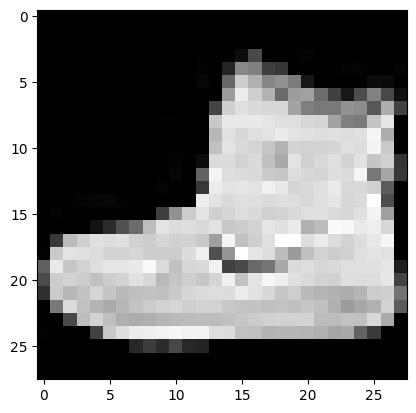

In [50]:
plt.imshow(image.squeeze(),cmap='gray')

In [51]:
image.shape

torch.Size([1, 28, 28])

### 7.1 Stepping through `nn.Conv2d()`


We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`.

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [52]:
torch.manual_seed(42)

# Create a batchof images
images = torch.randn(size=(32,3,64,64))
test_image=images[0]


print(f'Images batch shape :{images.shape}')
print(f'Single Image shape: {test_image.shape}')
print(f'Test Image:\n {test_image}')

Images batch shape :torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [53]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,
                       kernel_size=(3,3),stride=1,padding=0)

# Pass the data through the CNN layer
conv_output = conv_layer(test_image)

> **Question:** What should we set the parameters of our `nn.Conv2d()` layers?
>
> That's a good one. But similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as "**hyperparameters**").
>
> The best way to find out is to try out different values and see how they effect your model's performance.
>
> Or even better, find a working example on a problem similar to yours (like we've done with TinyVGG) and copy it.

We're working with a different of layer here to what we've seen before.

But the premise remains the same: start with random numbers and update them to better represent the data.

### 7.2 Stepping through `nn.MaxPool2d()`

In [54]:
# Print out original image shape
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension :{test_image.unsqueeze(0).shape}')


#Creata max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'Shape after going through conv_layer()" {test_image_through_conv.shape}')

# Pass data through the max pool layer
test_image_through_conv_and_max_pool= max_pool_layer(test_image_through_conv)

print(f'Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension :torch.Size([1, 3, 64, 64])
Shape after going through conv_layer()" torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])


In [55]:
torch.manual_seed(42)

# Create a radnom tensor with a similar number of dimensions to our shape
random_tensor = torch.randn(size=(1,1,2,2))
print(f'\nRandom tensor : \n {random_tensor}')
print(f'\n Shape of random tensor : {random_tensor.shape}')

# Create a max pool layer
max_pool_laer = nn.MaxPool2d(kernel_size=2)

# Pass the rajdom tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\n Max Pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape :{max_pool_tensor.shape}')



Random tensor : 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Shape of random tensor : torch.Size([1, 1, 2, 2])

 Max Pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape :torch.Size([1, 1, 1, 1])


### 7.3 Setup an loss function and optimizer for `model_2`

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr=0.1)

### 7.4 Training and testing `model_2` using our training and testing functions

In [63]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch : { epoch} \n------------')
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn = loss_fn ,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn = loss_fn ,
             accuracy_fn = accuracy_fn,
             device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
------------
Train loss :0.59639 | Train acc:78.33%
Test loss : 0.37117 | Test acc: 86.65%
Epoch : 1 
------------
Train loss :0.36025 | Train acc:87.02%
Test loss : 0.35502 | Test acc: 87.45%
Epoch : 2 
------------
Train loss :0.32512 | Train acc:88.32%
Test loss : 0.33613 | Test acc: 87.76%
Train time onn cuda: 66.611 seconds


As we can see that the accuracy of `model_2` is better than baseline model and let us evaluate our model with the help of function `eval_model()`

In [65]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36326950788497925,
 'model_acc': 87.01078274760384}

## 8. Compare model results and training time

We've trained three different models
* `Model_0` : Our baseline model with two `nn.Linear()` layers.
* `Model_1`: Our non-linear model with Flatten layers along wit `nn.ReLU()` and `nn.Linear()`
* `Model_2`: Model with CNN netwoek `nn.Conv2d()`

Let us combine our model resuts into a dataframe

In [68]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTMOdelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.363270,87.010783


Let us try adding training times


In [69]:
compare_results['training_time']= [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTMOdelV0,0.476639,83.426518,49.977929
1,FashionMNISTModelV1,0.685001,75.019968,43.669222
2,FashionMNISTModelV2,0.363270,87.010783,66.610713


It looks like our `FashionMNISTModelV2` has the best accuracy and best loss but had the longest training time

ANd `FashionMNISTModelV0` performed better than `FashionMNISTModelV1`

**Performance-speed tradeoff**

Something to be aware of in machine learning is the performance-speed tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with model_2).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

> **Note**: The training times you get will be very dependant on the hardware you use.
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
>
> Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.

How about we get visual?

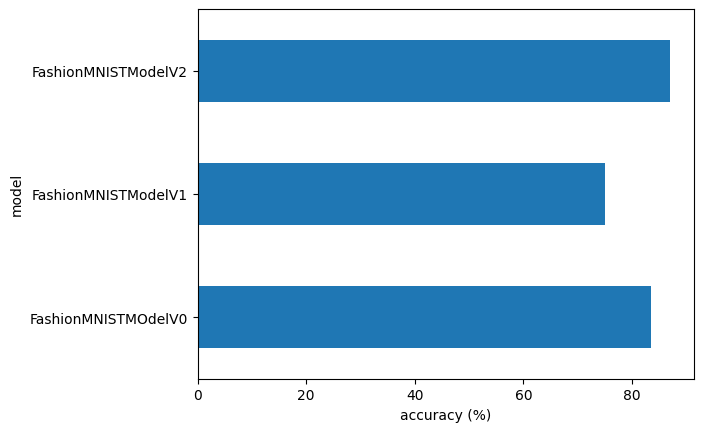

In [70]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

As far we have compared our model and got the best model , let us further evaluate our best model by making some random predictions

Let us create a function `make_predictions()`

In [79]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  """Predict the random samples fro the test adataset. Make predictions using our model and visualize them"""
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample=torch.unsqueeze(sample,dim=0).to(device)

      # FOrward passs (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> predicition probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prod off the GPU for further calculation s
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [86]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Viw the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

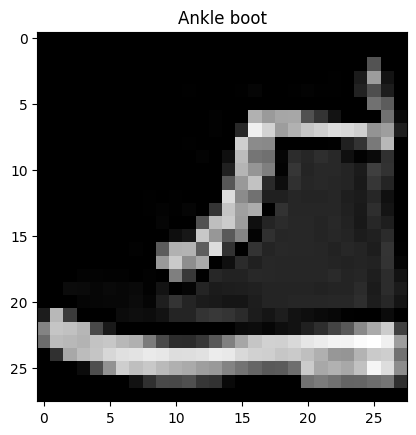

In [87]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [88]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.9500e-06, 3.9958e-08, 9.0819e-08, 1.9453e-06, 8.0325e-08, 2.4702e-03,
         9.6127e-08, 1.8987e-03, 1.0292e-03, 9.9460e-01],
        [2.1450e-06, 3.2053e-07, 7.2515e-07, 1.2618e-07, 2.3569e-08, 5.6556e-04,
         5.5051e-08, 9.8643e-01, 4.5290e-04, 1.2551e-02]])

In [89]:
#COnvert predi tion probabiites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 2])

In [90]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

(-0.5, 27.5, 27.5, -0.5)

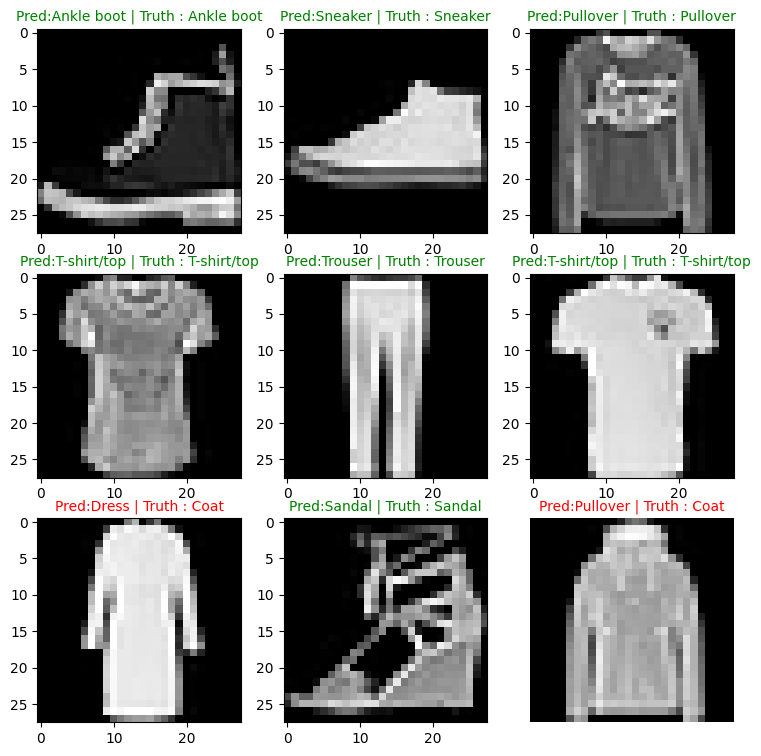

In [91]:
# Plt predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # GEt the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for plot
  title_text = f'Pred:{pred_label} | Truth : {truth_label}'

  # Check for equality between pred and truth and change the color of title text'
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
    plt.title(title_text,fontsize=10,c='r')
plt.axis(False)

## 10. Making a confusion matrix for further evaluation

A confusion matrxi is a fantastic way of evaluationg your classification models  visually,

1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [93]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [94]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [96]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 955.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

`torchmetrics` and `mlxtend` installed, let's make a confusion matrix!

First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

Finally we can plot our confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

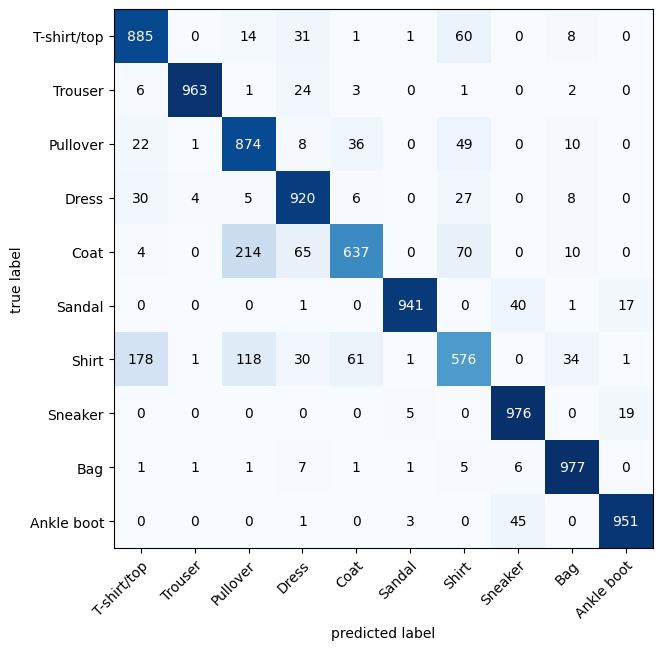

In [97]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

Woah! Doesn't that look good?

We can see our model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use *where* a model is getting things wrong.

It also hints at *why* the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?